In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt
import random
%matplotlib inline

In [2]:
mat_dict = sio.loadmat("data.mat")

In [3]:
data = mat_dict["data"]
data = np.swapaxes(data.T,1,2)
time_series = mat_dict["time_points"]
labels = mat_dict["label"]
channel_labels = mat_dict['channel_labels']
data = data
normalized_data = np.zeros_like((data),dtype="float32")
for i in range(24):
    maximum = np.max(data[:,i,:])
    minimum = np.min(data[:,i,:])
    normalized_data[:,i,:] = (data[:,i,:]-minimum)/(maximum-minimum)
print(np.mean(normalized_data))
print(np.std(normalized_data))
print(np.min(normalized_data))
print(np.max(normalized_data))

0.5013482
0.13648543
0.0
1.0


In [4]:
t,dt = np.linspace(-0.2,3,801,retstep=True)
print(t.shape)
print(dt)
fs = 1/dt
print(fs)
w = 5
freq = np.array([1,2,4,7,12,18,25,32,40,45])
widths = w*fs / (2*freq*np.pi)

(801,)
0.004
250.0


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_wavelets.py:480: ComplexWarning: Casting complex values to real discards the imaginary part
  output[ind] = convolve(data, wavelet_data, mode='same')


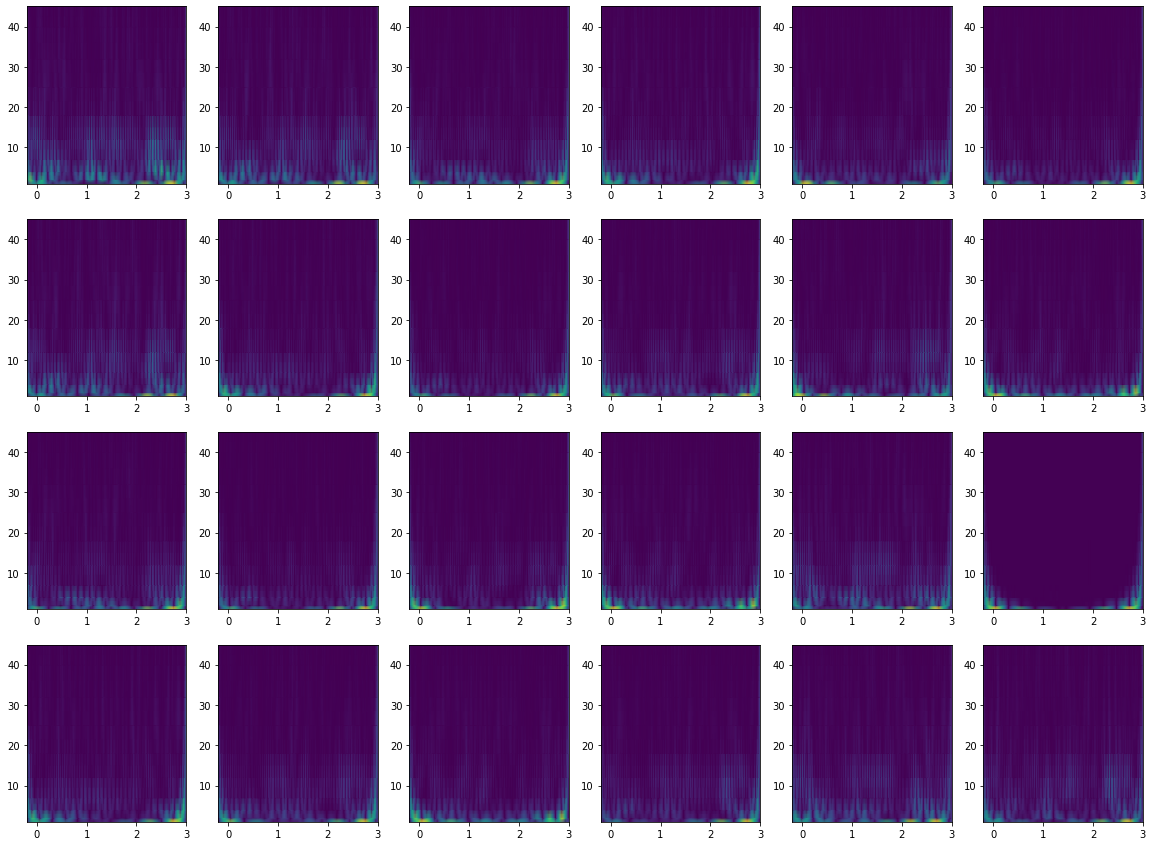

In [5]:
fig, axs = plt.subplots(4,6,figsize=(20,15))
for i in range(4):
    for j in range(6):
        sig = normalized_data[0,(i+1)*(j+1)-1,:]
        cwtm = signal.cwt(sig, signal.morlet2,widths, w=w,dtype='float32')
        axs[i,j].pcolormesh(t, freq, np.abs(cwtm), shading='gouraud')
plt.show()

In [6]:
def cwt_wavelet_transform(data):
    num = len(data)

    wavelet = 'morl' # wavelet type: morlet
    fs = 250.0 # sampling frequency: 8KHz # scales for morlet wavelet 
    t,dt = np.linspace(-0.2,3,801,retstep=True)
    w = 5
    scalogram_data = np.zeros([num,24,5,801])
    # freq = np.array([1,2,4,7,12,18,25,32,40,45])
    freq = np.linspace(1,45,45)

    widths = w*fs / (2*freq*np.pi)
    print("These are the scales that we are using: ", widths)

    frequencies = pywt.scale2frequency(wavelet, widths) / dt # Get frequencies corresponding to scales
    print("These are the frequencies that re associated with the scales: ", frequencies)
    

    adelta = np.zeros([801])
    atheta = np.zeros([801])
    aalpha = np.zeros([801])
    abeta = np.zeros([801])
    agamma = np.zeros([801])
    
    for i in range(num):
        if i % 100 == 0:
            print("Now on " + str(i))
        for j in range(24):
            sig = data[i,j]
            wavelet_coeffs, freqs = pywt.cwt(sig, widths, wavelet = wavelet, sampling_period=dt)
            
            wavelet_coeffs = np.abs(wavelet_coeffs)


            for k in range(801):
                
                adelta[k] = np.mean(wavelet_coeffs[:4,k])
                atheta[k] = np.mean(wavelet_coeffs[4:8,k])
                aalpha[k] = np.mean(wavelet_coeffs[8:14,k])
                abeta[k] = np.mean(wavelet_coeffs[14:30,k])
                agamma[k] = np.mean(wavelet_coeffs[30:45,k])
            
            delta = (adelta-np.min(adelta))/(np.max(adelta)-np.min(adelta))
            theta = (atheta-np.min(atheta))/(np.max(atheta)-np.min(atheta))
            alpha = (aalpha-np.min(aalpha))/(np.max(aalpha)-np.min(aalpha))
            beta = (abeta-np.min(abeta))/(np.max(abeta)-np.min(abeta))
            gamma = (agamma-np.min(agamma))/(np.max(agamma)-np.min(agamma))

            for l in range(5):
                if l == 0:
                    scalogram_data[i,j,l] = delta
                if l == 1:
                    scalogram_data[i,j,l] = theta
                if l == 2:
                    scalogram_data[i,j,l] = alpha
                if l == 3:
                    scalogram_data[i,j,l] = beta
                if l == 4:
                    scalogram_data[i,j,l] = gamma
    return scalogram_data

In [8]:
transformed_data = cwt_wavelet_transform(data)
print(transformed_data.shape)

These are the scales that we are using:  [198.94367886  99.47183943  66.31455962  49.73591972  39.78873577
  33.15727981  28.42052555  24.86795986  22.10485321  19.89436789
  18.08578899  16.57863991  15.30335991  14.21026278  13.26291192
  12.43397993  11.70256934  11.0524266   10.47071994   9.94718394
   9.47350852   9.04289449   8.64972517   8.28931995   7.95774715
   7.65167996   7.3682844    7.10513139   6.86012686   6.63145596
   6.41753803   6.21698996   6.02859633   5.85128467   5.68410511
   5.5262133    5.37685619   5.23535997   5.10111997   4.97359197
   4.85228485   4.73675426   4.62659718   4.52144725   4.42097064]
These are the frequencies that re associated with the scales:  [ 1.02101761  2.04203522  3.06305284  4.08407045  5.10508806  6.12610567
  7.14712329  8.1681409   9.18915851 10.21017612 11.23119374 12.25221135
 13.27322896 14.29424657 15.31526419 16.3362818  17.35729941 18.37831702
 19.39933464 20.42035225 21.44136986 22.46238747 23.48340509 24.5044227
 25.525440

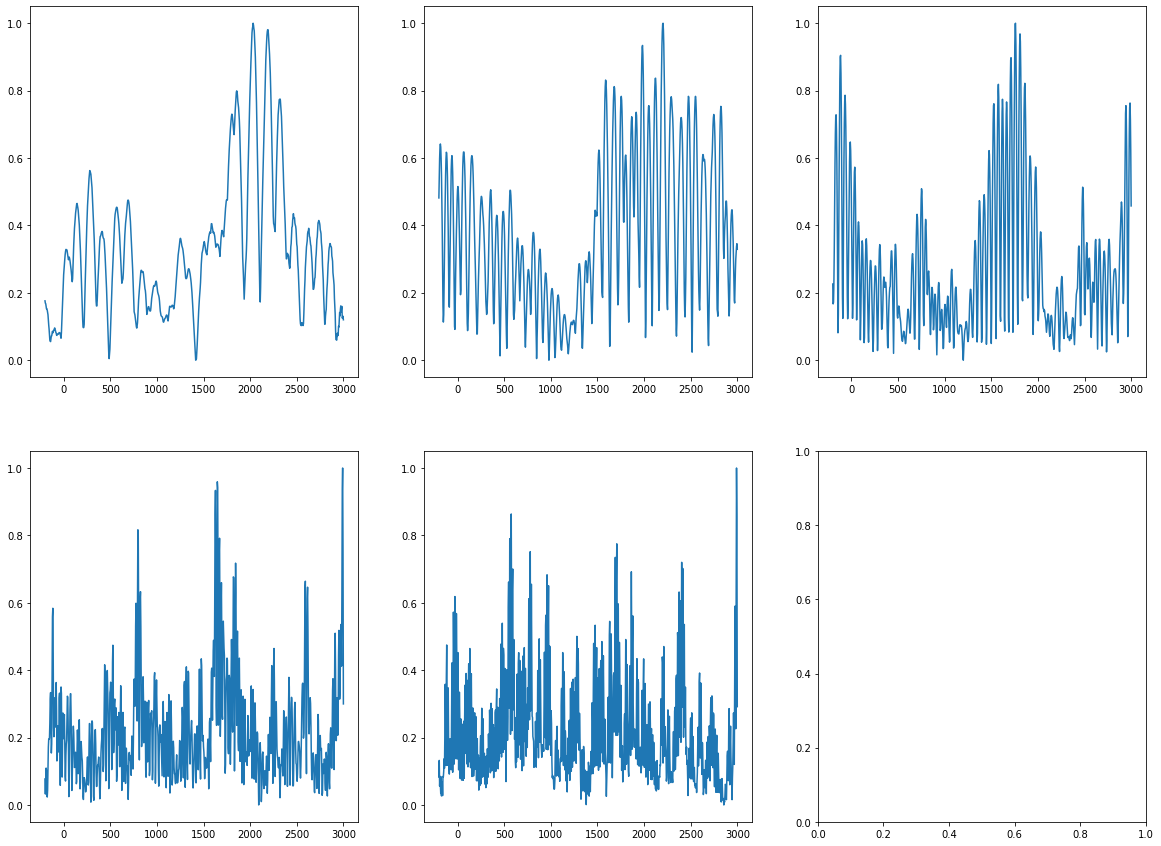

In [9]:
fig, axs = plt.subplots(2,3,figsize=(20,15))
data_p = random.randint(0,len(transformed_data)-1)
channel = random.randint(0,23)
for i in range(5):
    if i == 0:
        axs[0,0].plot(time_series,transformed_data[data_p,channel,i])
    if i == 1:
        axs[0,1].plot(time_series,transformed_data[data_p,channel,i])
    if i == 2:
        axs[0,2].plot(time_series,transformed_data[data_p,channel,i])
    if i == 3:
        axs[1,0].plot(time_series,transformed_data[data_p,channel,i])
    if i == 4:
        axs[1,1].plot(time_series,transformed_data[data_p,channel,i])

In [16]:
def partition_data(data,labels,percentage):
    amount_of_data = len(data)
    test_amount = (amount_of_data*percentage)//100
    train_amount = amount_of_data - test_amount
    testdata = np.zeros_like(data[:test_amount],dtype="float32")
    testlabels = np.zeros(test_amount,dtype="int64")
    traindata = np.zeros_like(data[:train_amount],dtype="float32")
    trainlabels = np.zeros(train_amount,dtype="int64")

    
    index_test_list = random.sample(range(amount_of_data),test_amount)
    index_train_list = list(set(range(amount_of_data)) - set(index_test_list))
    

    for index,sampled_index in enumerate(index_test_list):
        testdata[index] = data[sampled_index]
        testlabels[index] = labels[sampled_index]
    for index,sampled_index in enumerate(index_train_list):
        traindata[index] = data[sampled_index]
        trainlabels[index] = labels[sampled_index]
        
    return traindata,trainlabels,testdata,testlabels

traindata,trainlabels,testdata,testlabels = partition_data(transformed_data,labels,percentage=10)

(10, 24, 5, 801)
(90, 24, 5, 801)


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.layers import Input, Flatten

In [36]:
def CNNLSTM(channel=120,time_points=801,n_classes=26):
    inputs = Input(shape=(time_points,channel))
    conv = Conv1D(2,2)(inputs)
    conv = Conv1D(4,2)(conv)
    conv = Activation('relu')(conv)
    conv = Dropout(0.5)(conv) 
    conv = MaxPooling1D(2)(conv)
    conv = Flatten()(conv)
    conv = LSTM(100)(tf.expand_dims(conv,axis=1))
    conv = Dropout(0.5)(conv)
    conv = Dense(64)(conv)
    conv = Dense(64)(conv)
    conv = Dense(64)(conv)
    conv = Dropout(0.25)(conv)
    conv = Dense(26,activation='relu')(conv)
    # conv = Dropout(0.25)(conv)
    # outputs = Dense(n_classes,activation='softmax')(conv)
    output = Activation('softmax')(conv)

    return Model(inputs=inputs,outputs=output)

model = CNNLSTM()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 801, 120)]        0         
                                                                 
 conv1d_6 (Conv1D)           (None, 800, 2)            482       
                                                                 
 conv1d_7 (Conv1D)           (None, 799, 4)            20        
                                                                 
 activation_6 (Activation)   (None, 799, 4)            0         
                                                                 
 dropout_9 (Dropout)         (None, 799, 4)            0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 399, 4)           0         
 1D)                                                             
                                                           

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [38]:
traindata = traindata.reshape((len(traindata),120,801))
traindata = np.swapaxes(traindata,1,2)
traindata.shape

(90, 801, 120)

In [39]:
train_dataset = tf.data.Dataset.from_tensor_slices((traindata, trainlabels))
BATCH_SIZE = 24
SHUFFLE_BUFFER_SIZE = 100
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [40]:
model.fit(train_dataset, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 17ms/step - loss: 2.0637 - sparse_categorical_accuracy: 0.7667
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.0870 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 2.0267e-04 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 7.7335e-06 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 1.5897e-05 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 1.7484e-07 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 1.9603e-07 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 2.3842e-08 - sparse_categorical_accuracy: 1.0000
Epoch 9/100
4/4 [=======================

4/4 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 69/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 70/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
4/4 [==============================] - 0s 17ms/step - loss: 1.3245e-09 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
4/4 [==============================] - 0s 13ms/step - loss: 1.3245e-09 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
4/4 [==============================] - 0s 13ms/step - loss: 4.3710e-08 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
4/4 [==============================] - 0s 15ms/step - loss: 5.2982e-09 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
4/4 [===================